#### Ana Laura García

# Espectroscopía integrada de sistemas estelares galácticos y extragalácticos

# Primera parte: Un espectro a la vez

Para empezar, se importarán los datos con los cuales se trabajará.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#leo la tabla
table = pd.read_csv('bc2003_hr_m22_chab_ssp_020.spec', comment='#', header=None, sep=' ', skipinitialspace=True)
#ademas quiero guardar el dato de la edad
data = pd.read_csv('bc2003_hr_m22_chab_ssp_020.spec', header=None, skiprows=4, skipfooter=6901, sep=' ')

/tmp/ipykernel_5926/2035739249.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('bc2003_hr_m22_chab_ssp_020.spec', header=None, skiprows=4, skipfooter=6901, sep=' ')


Veamos la información que tomé de las tablas:

In [3]:
table

,0,1
0,91.0,4.285000e-08
1,94.0,9.240000e-08
2,96.0,1.497000e-07
3,98.0,2.374000e-07
4,100.0,3.688000e-07
...,...,...
6895,800000.0,8.344000e-12
6896,1000000.0,3.408000e-12
6897,1200000.0,1.640000e-12
6898,1400000.0,8.832000e-13


En "data" guardé el dato de la edad correspondiente

In [4]:
data

,0,1,2,3,4,5,6,7,8
0,#,Age,(yr),NaN,NaN,NaN,NaN,NaN,1000000.0


In [5]:
age=data[8]

In [6]:
age

0    1000000.0
Name: 8, dtype: float64

Vamos a darle nombres a las columnas

In [7]:
table.columns = ['Longitud (A)', 'Flujo']

In [8]:
table

,Longitud (A),Flujo
0,91.0,4.285000e-08
1,94.0,9.240000e-08
2,96.0,1.497000e-07
3,98.0,2.374000e-07
4,100.0,3.688000e-07
...,...,...
6895,800000.0,8.344000e-12
6896,1000000.0,3.408000e-12
6897,1200000.0,1.640000e-12
6898,1400000.0,8.832000e-13


Graficamos para tener una visualización de los datos.

In [9]:
#voy a terminar ploteando un rango más chico (óptico), aquí voy a probar
table['Longitud (A)'][330:4100]

330     2990.0
331     3010.0
332     3030.0
333     3050.0
334     3070.0
         ...  
4095    7070.0
4096    7071.0
4097    7072.0
4098    7073.0
4099    7074.0
Name: Longitud (A), Length: 3770, dtype: float64

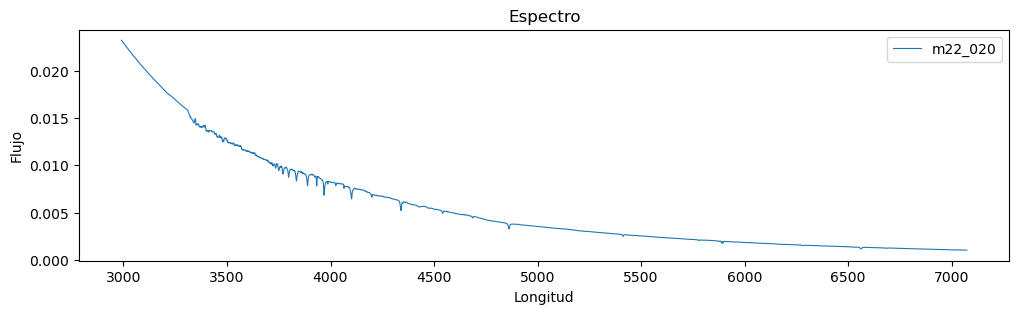

In [244]:
plt.figure(figsize=(12,3))
plt.plot(table['Longitud (A)'][330:4100], table['Flujo'][330:4100], lw=0.8, label='m22_020')
plt.xlabel('Longitud')
plt.ylabel('Flujo')
plt.title('Espectro')
plt.legend()

Hasta acá pudimos visualizar uno de los espectros.

## Espectro normalizado

Ahora vamos a probar con uno normalizado.

In [11]:
norm =pd.read_csv('bc2003_hr_m22_chab_ssp_020.spec.norm', comment= '#', header=None, sep='\s+')
norm.columns = ['Longitud', 'Flujo']

In [12]:
norm

,Longitud,Flujo
0,3323,6.0020
1,3324,5.9790
2,3325,5.9590
3,3326,5.9270
4,3327,5.9040
...,...,...
5726,9049,0.1638
5727,9050,0.1617
5728,9051,0.1601
5729,9052,0.1612


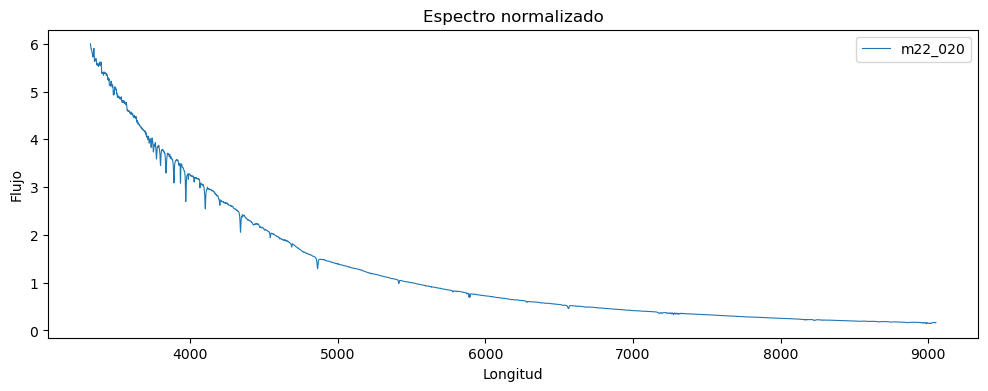

In [245]:
#graficamos
plt.figure(figsize=(12,4))
plt.plot(norm['Longitud'], norm['Flujo'], lw=0.8, label='m22_020')
plt.xlabel('Longitud')
plt.ylabel('Flujo')
plt.title('Espectro normalizado')
plt.legend()

# Segunda parte: Espectros por grupos de metalicidad o edad (todos juntos!)

Ahora queremos leer muchos archivos a la vez para superponerlos en un plot

In [14]:
#en "lista" están los nombres de los archivos normalizados para las diferentes metalicidades y años
lista = pd.read_csv('lista', header=None)

## Lista con los nombres de los archivos
Esta lista es importante porque después la vuelvo a usar

In [15]:
lista

,0
0,bc2003_hr_m22_chab_ssp_020.spec.norm
1,bc2003_hr_m22_chab_ssp_045.spec.norm
2,bc2003_hr_m22_chab_ssp_055.spec.norm
3,bc2003_hr_m22_chab_ssp_061.spec.norm
4,bc2003_hr_m22_chab_ssp_067.spec.norm
...,...
145,bc2003_hr_m72_chab_ssp_171.spec.norm
146,bc2003_hr_m72_chab_ssp_181.spec.norm
147,bc2003_hr_m72_chab_ssp_193.spec.norm
148,bc2003_hr_m72_chab_ssp_201.spec.norm


In [31]:
#veo el elemento 0,0 de la lista (sería el primer archivo)
lista[0][0]

'bc2003_hr_m22_chab_ssp_020.spec.norm'

In [49]:
#compruebo que puedo leer el archivo como elemento de esa lista 
prueba=pd.read_csv(lista[0][0], comment='#', header=None, sep='\s+')

In [50]:
prueba

,0,1
0,3323,6.0020
1,3324,5.9790
2,3325,5.9590
3,3326,5.9270
4,3327,5.9040
...,...,...
5726,9049,0.1638
5727,9050,0.1617
5728,9051,0.1601
5729,9052,0.1612


In [19]:
#hago pruebitas:
for i in range(3):
    print(i)

0
1
2


In [18]:
#pruebita
range(lista[0])

TypeError: 'Series' object cannot be interpreted as an integer

In [20]:
#pruebita
len(lista)

150

In [21]:
#pruebita
range(len(lista))

range(0, 150)

In [22]:
#pruebita
for i in range(len(lista)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


## Tabla de tablas
Aquí leo todos los archivos al mismo tiempo y los guargo en algo que se llama "tablas" y quedan en el mismo orden que los archivos de la lista con los nombres

In [77]:
#leo las tablas normalizadas y las llamo "tabla_i" con i de 0 a 149
#creo un conjunto para guardar ahi las tablas, me sirve para poder darles nombre
tablas = {}
for i in range(len(lista)):
    table_norm = pd.read_csv(lista[0][i], comment='#', header=None, sep='\s+')
    nombre = f"table_{i}"
    tablas[nombre] = table_norm
    

In [78]:
#veo una tabla
tablas['table_0']

,0,1
0,3323,6.0020
1,3324,5.9790
2,3325,5.9590
3,3326,5.9270
4,3327,5.9040
...,...,...
5726,9049,0.1638
5727,9050,0.1617
5728,9051,0.1601
5729,9052,0.1612


In [79]:
#veo un elemento de una tabla
tablas['table_0'][0][0]

3323

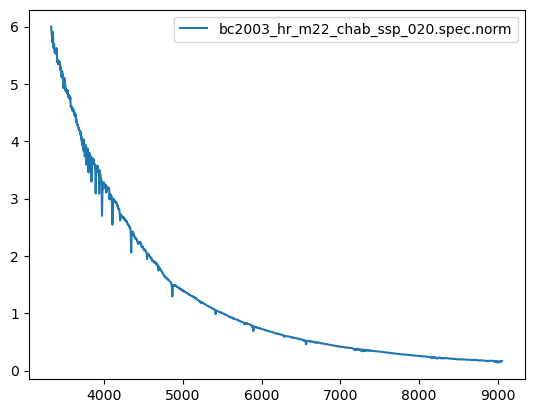

In [83]:
#grafico una tabla para comprobar que funciona
name= lista[0][0]
plt.plot(tablas['table_0'][0], tablas['table_0'][1], label=name)
plt.legend()

In [84]:
#recordamos la lista
lista

,0
0,bc2003_hr_m22_chab_ssp_020.spec.norm
1,bc2003_hr_m22_chab_ssp_045.spec.norm
2,bc2003_hr_m22_chab_ssp_055.spec.norm
3,bc2003_hr_m22_chab_ssp_061.spec.norm
4,bc2003_hr_m22_chab_ssp_067.spec.norm
...,...
145,bc2003_hr_m72_chab_ssp_171.spec.norm
146,bc2003_hr_m72_chab_ssp_181.spec.norm
147,bc2003_hr_m72_chab_ssp_193.spec.norm
148,bc2003_hr_m72_chab_ssp_201.spec.norm


## Diferentes edades, misma metalicidad

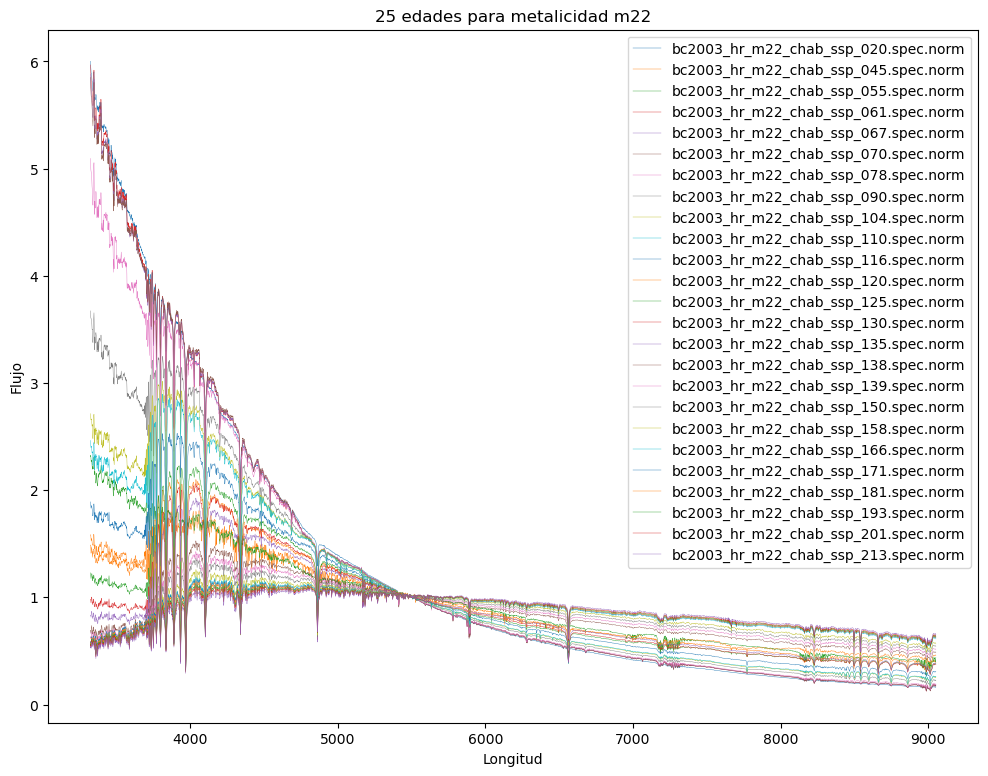

In [105]:
#vamos a intentar graficar todas las tablas juntas para una misma metalicidad
#son 25 edades por metalicidad, empezamos con las primeras de 0 a 24

plt.figure(figsize=(12,9))
for i in range(25):
    name= lista[0][i]
    plt.plot(tablas[f'table_{i}'][0], tablas[f'table_{i}'][1], lw=0.3, label=name)
plt.xlabel('Longitud')
plt.ylabel('Flujo')
plt.title('25 edades para metalicidad m22')
plt.legend()

In [103]:
#pruebita
for i in range(25,50):
    print(i)

25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Text(0.5, 1.0, '25 edades para metalicidad m32')

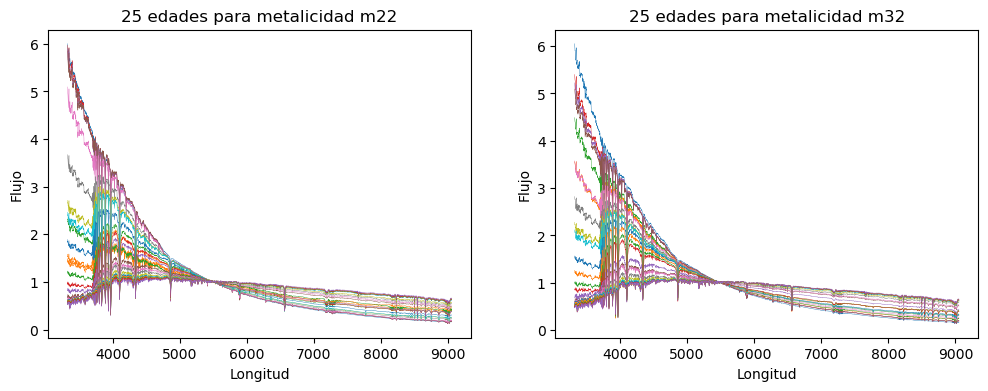

In [111]:
#hacemos una prueba con dos diferentes metalicidades por separado
#queremos graficarlas al mismo tiempo en el mismo lugar

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for i in range(25):
    name= lista[0][i]
    plt.plot(tablas[f'table_{i}'][0], tablas[f'table_{i}'][1], lw=0.3, label=name)
plt.xlabel('Longitud')
plt.ylabel('Flujo')
plt.title('25 edades para metalicidad m22')
#plt.legend()

#plt.figure(figsize=(12,9))
plt.subplot(1,2,2)
for i in range(25,50):
    name= lista[0][i]
    plt.plot(tablas[f'table_{i}'][0], tablas[f'table_{i}'][1], lw=0.3, label=name)
plt.xlabel('Longitud')
plt.ylabel('Flujo')
plt.title('25 edades para metalicidad m32')
#plt.legend()

Ahora queremos hacerlo un poco más automático para las 6 metalicidades disponibles.

In [246]:
#necesito crear listas que vayan de 0 a 24, de 25 a 49, de 50 a 74, de 75 a 99 y así para despues tener 6 rangos
rango = {}
for j in range(6):
    rango[j] = []
    for l in range(25):
        rango[j].append(l+(j*25))
print(rango)

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 1: [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 2: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74], 3: [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 4: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124], 5: [125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}


In [177]:
rango

{0: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 1: [25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 2: [50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74],
 3: [75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 4: [100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124],
 5: [125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149]}

In [179]:
#veo un elemento
rango[0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

## Gráfico de edades para una misma metalicidad
## (Aquí se puede variar la metalicidad)

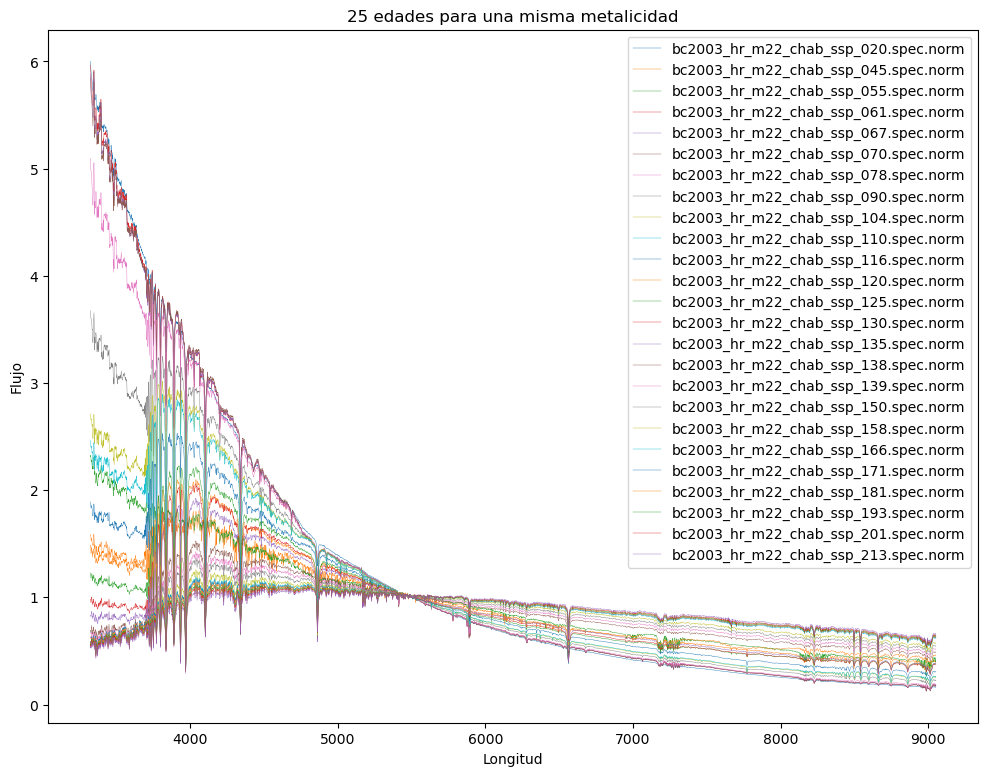

In [243]:
#para ver otra metalicidad cambiar el m en "rango[m]" con m entre 0 a 5

plt.figure(figsize=(12,9))
for i in rango[0]:
    name= lista[0][i]
    plt.plot(tablas[f'table_{i}'][0], tablas[f'table_{i}'][1], lw=0.3, label=name)
plt.xlabel('Longitud')
plt.ylabel('Flujo')
plt.title('25 edades para una misma metalicidad')
plt.legend()

## Todas las metalicidades por separado al mismo tiempo

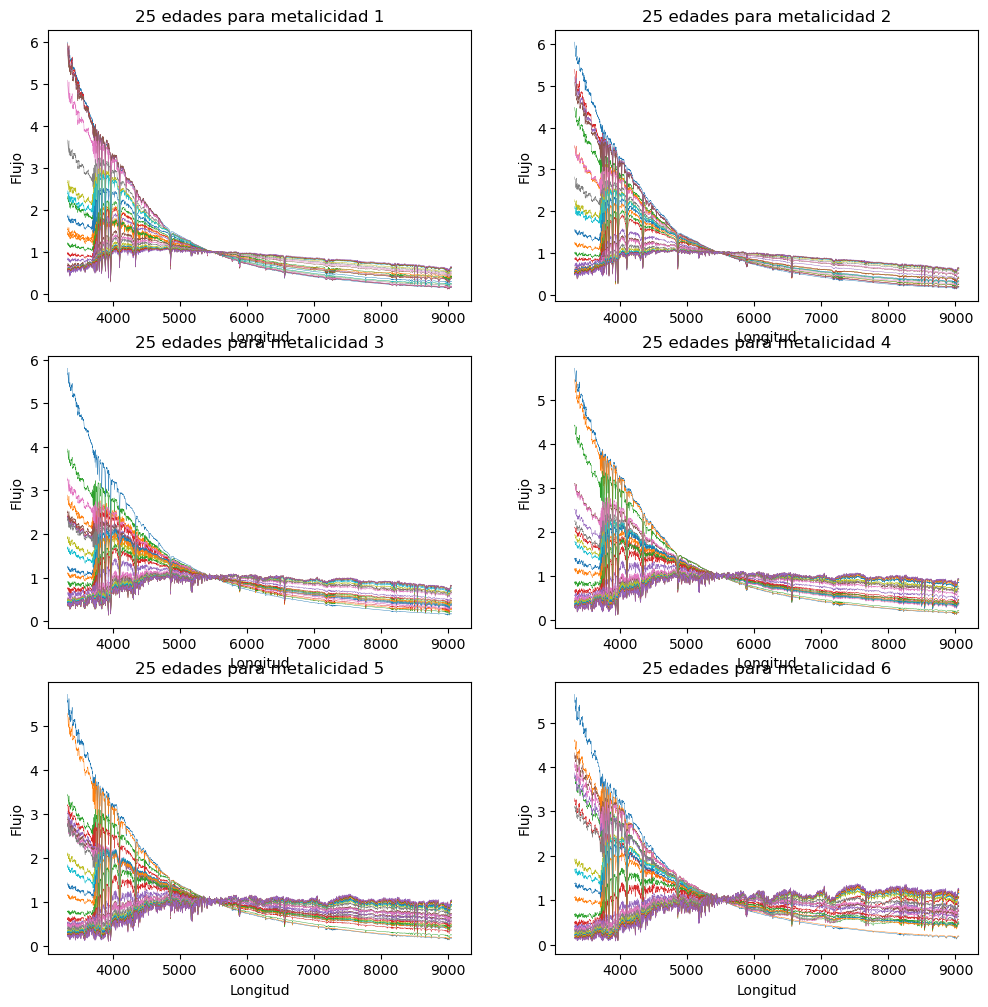

In [195]:
plt.figure(figsize=(12,12))
for j in range(6):
    plt.subplot(3,2,(j+1))
    for i in rango[j]:
        name= lista[0][i]
        plt.plot(tablas[f'table_{i}'][0], tablas[f'table_{i}'][1], lw=0.3, label=name)
    plt.xlabel('Longitud')
    plt.ylabel('Flujo')
    plt.title(f'25 edades para metalicidad {j+1}')
    #plt.legend()

## Listas de metalicidad
Aquí dejo armadas listas para cada metalicidad.

Contienen los nombres de los archivos de todas las edades disponibles para cada una, osea 25 edades para cada metalicidad.

In [188]:
#recordamos la lista
lista

,0
0,bc2003_hr_m22_chab_ssp_020.spec.norm
1,bc2003_hr_m22_chab_ssp_045.spec.norm
2,bc2003_hr_m22_chab_ssp_055.spec.norm
3,bc2003_hr_m22_chab_ssp_061.spec.norm
4,bc2003_hr_m22_chab_ssp_067.spec.norm
...,...
145,bc2003_hr_m72_chab_ssp_171.spec.norm
146,bc2003_hr_m72_chab_ssp_181.spec.norm
147,bc2003_hr_m72_chab_ssp_193.spec.norm
148,bc2003_hr_m72_chab_ssp_201.spec.norm


In [190]:
#voy a hacer "listas" de archivos según las diferentes metalicidades
#después las puedo leer como "metal[m]" a cada una cuando necesite

metal = {}
for j in range(6):
    metal[j] = []
    for m in rango[j]:
        metal[j].append(lista[0][m])

In [248]:
metal

{0: ['bc2003_hr_m22_chab_ssp_020.spec.norm',
  'bc2003_hr_m22_chab_ssp_045.spec.norm',
  'bc2003_hr_m22_chab_ssp_055.spec.norm',
  'bc2003_hr_m22_chab_ssp_061.spec.norm',
  'bc2003_hr_m22_chab_ssp_067.spec.norm',
  'bc2003_hr_m22_chab_ssp_070.spec.norm',
  'bc2003_hr_m22_chab_ssp_078.spec.norm',
  'bc2003_hr_m22_chab_ssp_090.spec.norm',
  'bc2003_hr_m22_chab_ssp_104.spec.norm',
  'bc2003_hr_m22_chab_ssp_110.spec.norm',
  'bc2003_hr_m22_chab_ssp_116.spec.norm',
  'bc2003_hr_m22_chab_ssp_120.spec.norm',
  'bc2003_hr_m22_chab_ssp_125.spec.norm',
  'bc2003_hr_m22_chab_ssp_130.spec.norm',
  'bc2003_hr_m22_chab_ssp_135.spec.norm',
  'bc2003_hr_m22_chab_ssp_138.spec.norm',
  'bc2003_hr_m22_chab_ssp_139.spec.norm',
  'bc2003_hr_m22_chab_ssp_150.spec.norm',
  'bc2003_hr_m22_chab_ssp_158.spec.norm',
  'bc2003_hr_m22_chab_ssp_166.spec.norm',
  'bc2003_hr_m22_chab_ssp_171.spec.norm',
  'bc2003_hr_m22_chab_ssp_181.spec.norm',
  'bc2003_hr_m22_chab_ssp_193.spec.norm',
  'bc2003_hr_m22_chab_ssp_201.s

In [249]:
#para ver una de las listas
metal[3]

['bc2003_hr_m52_chab_ssp_020.spec.norm',
 'bc2003_hr_m52_chab_ssp_045.spec.norm',
 'bc2003_hr_m52_chab_ssp_055.spec.norm',
 'bc2003_hr_m52_chab_ssp_061.spec.norm',
 'bc2003_hr_m52_chab_ssp_067.spec.norm',
 'bc2003_hr_m52_chab_ssp_070.spec.norm',
 'bc2003_hr_m52_chab_ssp_078.spec.norm',
 'bc2003_hr_m52_chab_ssp_090.spec.norm',
 'bc2003_hr_m52_chab_ssp_104.spec.norm',
 'bc2003_hr_m52_chab_ssp_110.spec.norm',
 'bc2003_hr_m52_chab_ssp_116.spec.norm',
 'bc2003_hr_m52_chab_ssp_120.spec.norm',
 'bc2003_hr_m52_chab_ssp_125.spec.norm',
 'bc2003_hr_m52_chab_ssp_130.spec.norm',
 'bc2003_hr_m52_chab_ssp_135.spec.norm',
 'bc2003_hr_m52_chab_ssp_138.spec.norm',
 'bc2003_hr_m52_chab_ssp_139.spec.norm',
 'bc2003_hr_m52_chab_ssp_150.spec.norm',
 'bc2003_hr_m52_chab_ssp_158.spec.norm',
 'bc2003_hr_m52_chab_ssp_166.spec.norm',
 'bc2003_hr_m52_chab_ssp_171.spec.norm',
 'bc2003_hr_m52_chab_ssp_181.spec.norm',
 'bc2003_hr_m52_chab_ssp_193.spec.norm',
 'bc2003_hr_m52_chab_ssp_201.spec.norm',
 'bc2003_hr_m52_

## Diferentes metalicidades, misma edad

In [250]:
#también puedo armarme grupos por edades con las diferentes metalicidades
#quiero 25 grupos con 6 integrantes cada uno
#necesito crear listitas que vayan como multiplos de 1 a 6

grupo = {}
for l in range(25):
    grupo[l] = []
    for j in range(6):
        grupo[l].append((j*25)+l)
print(grupo)

{0: [0, 25, 50, 75, 100, 125], 1: [1, 26, 51, 76, 101, 126], 2: [2, 27, 52, 77, 102, 127], 3: [3, 28, 53, 78, 103, 128], 4: [4, 29, 54, 79, 104, 129], 5: [5, 30, 55, 80, 105, 130], 6: [6, 31, 56, 81, 106, 131], 7: [7, 32, 57, 82, 107, 132], 8: [8, 33, 58, 83, 108, 133], 9: [9, 34, 59, 84, 109, 134], 10: [10, 35, 60, 85, 110, 135], 11: [11, 36, 61, 86, 111, 136], 12: [12, 37, 62, 87, 112, 137], 13: [13, 38, 63, 88, 113, 138], 14: [14, 39, 64, 89, 114, 139], 15: [15, 40, 65, 90, 115, 140], 16: [16, 41, 66, 91, 116, 141], 17: [17, 42, 67, 92, 117, 142], 18: [18, 43, 68, 93, 118, 143], 19: [19, 44, 69, 94, 119, 144], 20: [20, 45, 70, 95, 120, 145], 21: [21, 46, 71, 96, 121, 146], 22: [22, 47, 72, 97, 122, 147], 23: [23, 48, 73, 98, 123, 148], 24: [24, 49, 74, 99, 124, 149]}


In [251]:
grupo

{0: [0, 25, 50, 75, 100, 125],
 1: [1, 26, 51, 76, 101, 126],
 2: [2, 27, 52, 77, 102, 127],
 3: [3, 28, 53, 78, 103, 128],
 4: [4, 29, 54, 79, 104, 129],
 5: [5, 30, 55, 80, 105, 130],
 6: [6, 31, 56, 81, 106, 131],
 7: [7, 32, 57, 82, 107, 132],
 8: [8, 33, 58, 83, 108, 133],
 9: [9, 34, 59, 84, 109, 134],
 10: [10, 35, 60, 85, 110, 135],
 11: [11, 36, 61, 86, 111, 136],
 12: [12, 37, 62, 87, 112, 137],
 13: [13, 38, 63, 88, 113, 138],
 14: [14, 39, 64, 89, 114, 139],
 15: [15, 40, 65, 90, 115, 140],
 16: [16, 41, 66, 91, 116, 141],
 17: [17, 42, 67, 92, 117, 142],
 18: [18, 43, 68, 93, 118, 143],
 19: [19, 44, 69, 94, 119, 144],
 20: [20, 45, 70, 95, 120, 145],
 21: [21, 46, 71, 96, 121, 146],
 22: [22, 47, 72, 97, 122, 147],
 23: [23, 48, 73, 98, 123, 148],
 24: [24, 49, 74, 99, 124, 149]}

In [252]:
grupo[0]

[0, 25, 50, 75, 100, 125]

## Gráfico de metalicidades para una misma edad
## (Aquí se puede variar la edad)

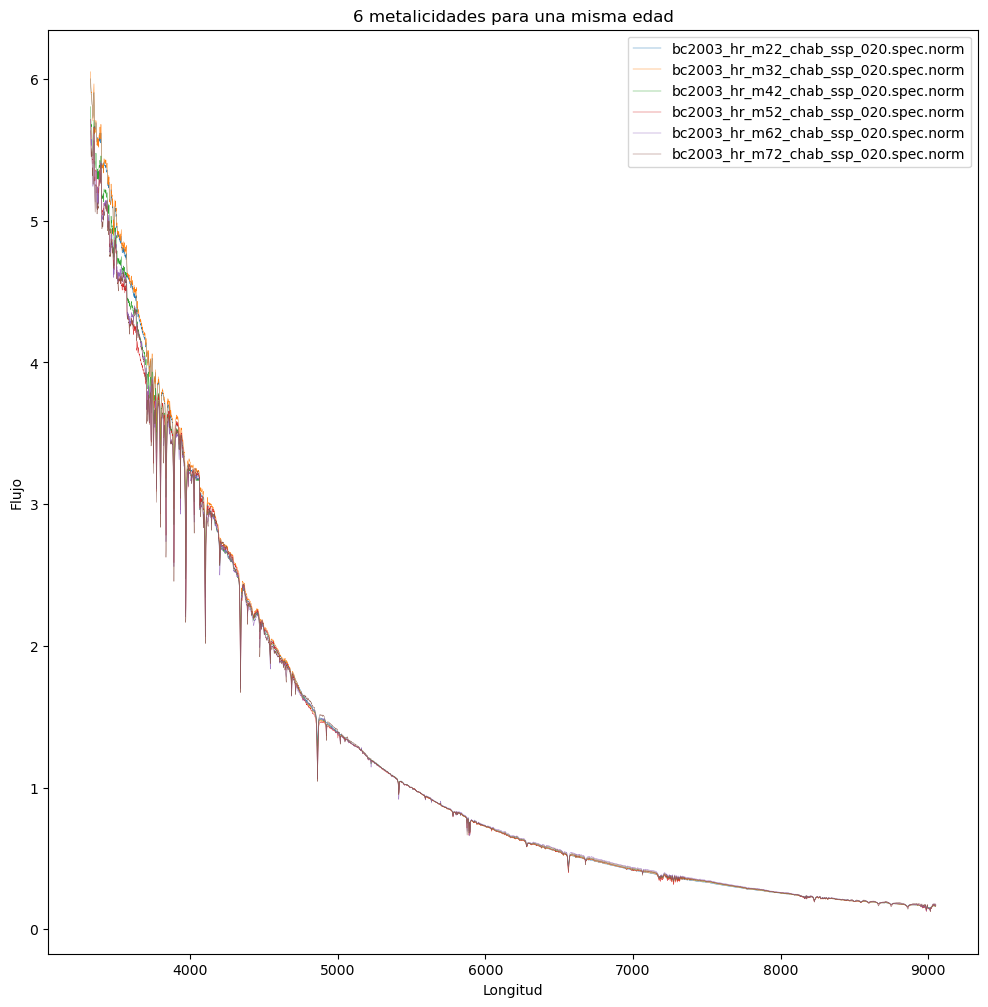

In [253]:
#grafico diferentes metalicidades para una misma edad
#para ver otras edades cambiar el valor de a en "grupo[a]" con a entre 0 a 24

plt.figure(figsize=(12,12))
for i in grupo[0]:
    name= lista[0][i]
    plt.plot(tablas[f'table_{i}'][0], tablas[f'table_{i}'][1], lw=0.3, label=name)
    plt.xlabel('Longitud')
    plt.ylabel('Flujo')
    plt.title('6 metalicidades para una misma edad')
    plt.legend()

## Todas las edades por separado al mismo tiempo

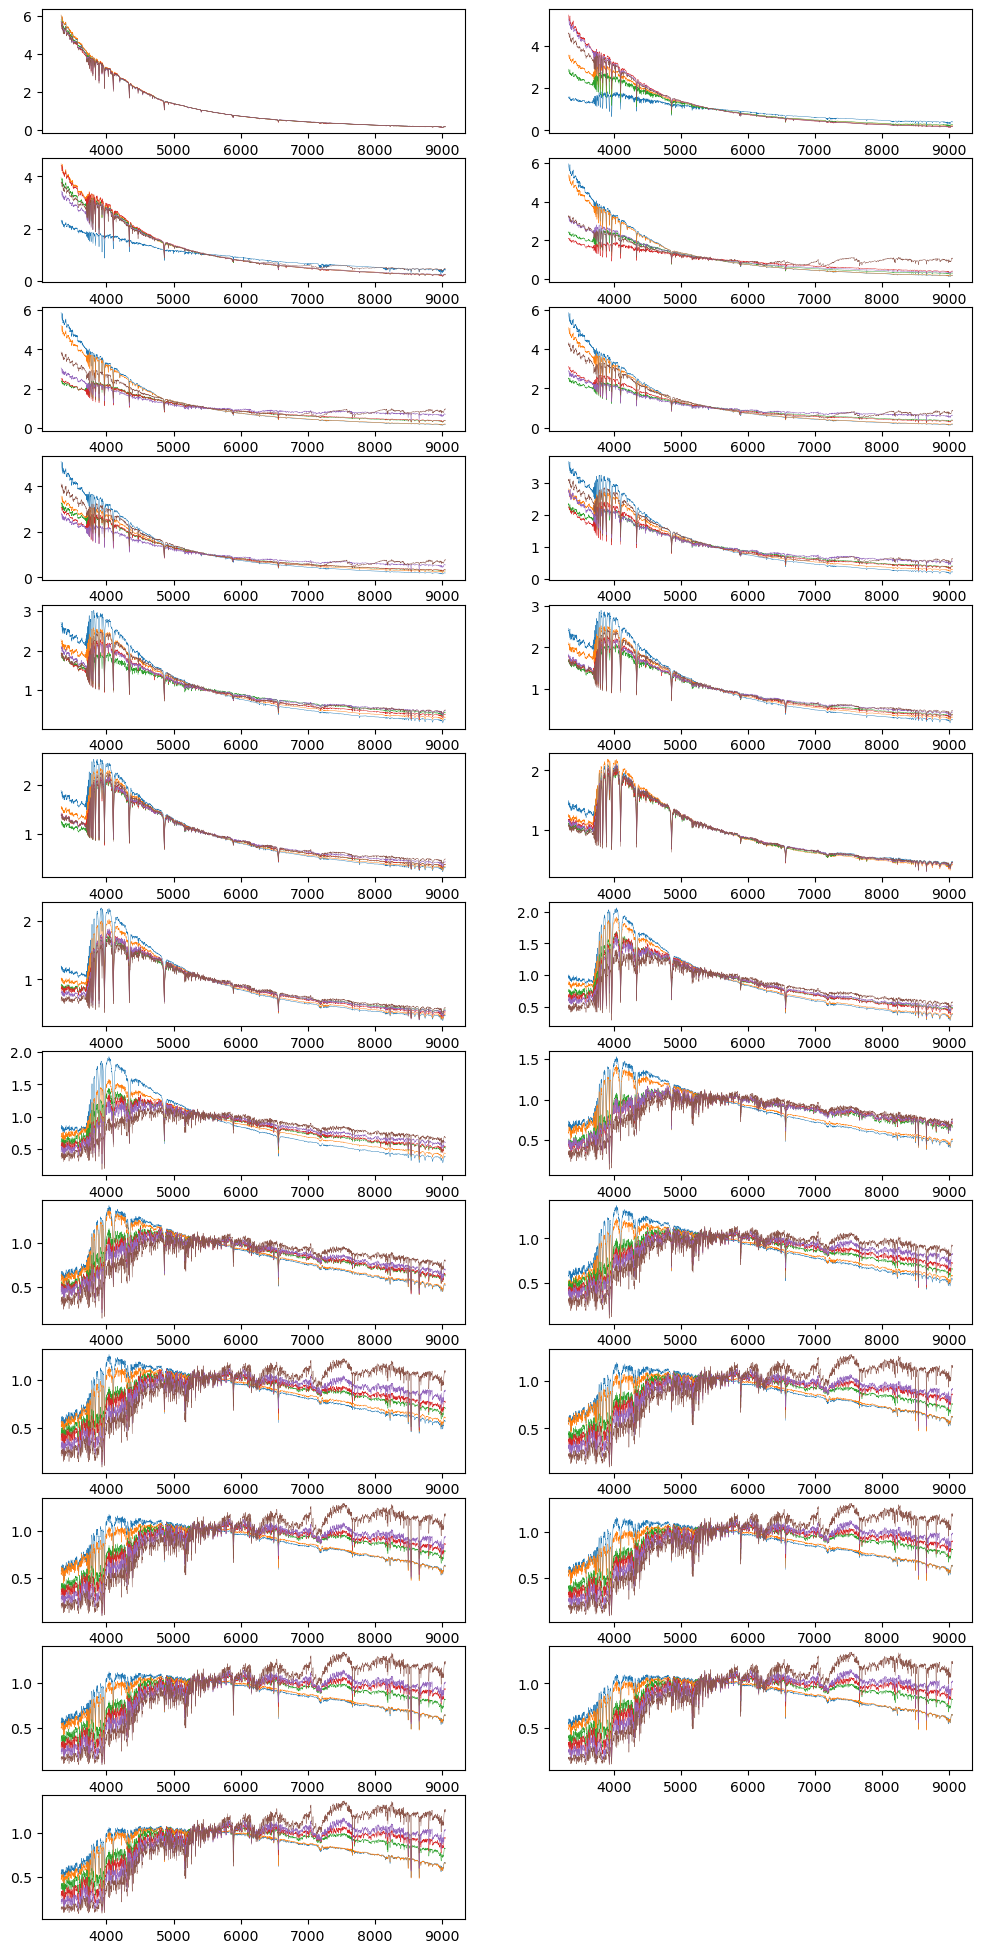

In [254]:
plt.figure(figsize=(12,48))
for l in range(25):
    plt.subplot(25,2,(l+1))
    for i in grupo[l]:
        name= lista[0][i]
        plt.plot(tablas[f'table_{i}'][0], tablas[f'table_{i}'][1], lw=0.3, label=name)
    #plt.xlabel('Longitud')
    #plt.ylabel('Flujo')
    #plt.title(f'6 metalicidades para la edad {l+1}')
    #plt.legend()


In [ ]:
#se define la funcion chi cuadrado
def chi2():
    for i in range(0, len(df['MAG'])):
        test=np.sum(((df['PHI'][i]-sch(df['MAG'])[i]) /error[i])**2)
    return(test)

In [ ]:
#se prueba la funcion
chi2()